In [1]:
#http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221226716255
#1. keras metrics로 precision,recall custom정의
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall

def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision

def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

Using TensorFlow backend.


In [2]:
#https://keras.io/examples/mnist_cnn/
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_cate = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy', precision, recall, f1score])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_cate))

#score = model.evaluate(x_test, y_test_cate, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

_loss, _acc, _precision, _recall, _f1score = model.evaluate(x_test, y_test_cate, verbose=0)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.2654 - accuracy: 0.9174 - precision: 0.9399 - recall: 0.8909 - f1score: 0.9087 - val_loss: 0.0539 - val_accuracy: 0.9826 - val_precision: 0.9862 - val_recall: 0.9807 - val_f1score: 0.9834
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0885 - accuracy: 0.9741 - precision: 0.9782 - recall: 0.9698 - f1score: 0.9740 - val_loss: 0.0404 - val_accuracy: 0.9861 - val_precision: 0.9886 - val_recall: 0.9853 - val_f1score: 0.9869
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0676 - accuracy: 0.9799 - precision: 0.9829 - recall: 0.9776 - f1score: 0.9802 - val_loss: 0.0336 - val_accuracy: 0.9892 - val_precision: 0.9907 - val_recall: 0.9880 - val_f1score: 0.9893
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0546 - accuracy: 0.9834 - precision: 0.9857 - recall: 0.9814 - f1s

In [4]:
pre_y = model.predict(x_test)
print(pre_y)

[[2.6039110e-10 1.9237070e-09 4.4335060e-08 ... 9.9999988e-01
  5.3540389e-10 4.3700357e-08]
 [1.3809424e-08 2.6485750e-06 9.9999726e-01 ... 1.6124678e-10
  1.5400569e-07 7.2392222e-12]
 [3.3852498e-07 9.9997556e-01 1.7664128e-06 ... 1.1897111e-05
  3.3031667e-06 1.5646542e-07]
 ...
 [1.8043955e-11 2.2700920e-08 6.9558942e-10 ... 1.9912150e-07
  1.3118772e-07 3.2641726e-06]
 [1.3248005e-09 1.0143227e-10 1.2070869e-13 ... 2.3988567e-10
  1.8179365e-06 1.6644318e-09]
 [3.2339406e-07 7.8986169e-09 1.6785234e-06 ... 1.3692738e-09
  3.9303174e-07 3.7962149e-09]]


In [5]:
import numpy as np
print(np.argmax(pre_y, axis=-1))

[7 2 1 ... 4 5 6]


In [6]:
#https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/
#2. sklearn 패키지로 좀더 친절하게 수치출력 및 표시

In [7]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

L_model = LogisticRegression().fit(X, y)
y_hat = L_model.predict(X)
f_value = L_model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

c_matrix = confusion_matrix(y, y_hat, labels=[1, 0])
print(c_matrix)
# 	          양성이라고 예측	                  음성이라고 예측
# 실제 양성 :	양성 예측이 맞음 (True Positive)	음성 예측이 틀림 (False Negative)
# 실제 음성 :	양성 예측이 틀림 (False Positive)	음성 예측이 맞음 (True Negative)

[[7 1]
 [1 7]]


In [22]:
def get_matrics_info(c_matrix):
    #recall = TP / (TP + FN)
    TP = c_matrix[0][0]
    FN = c_matrix[0][1]
    recall= TP / (TP+FN)
    print('TP:',TP)
    print('FN:',FN)
    print('recall:',recall)

    #fallout= FP / (FP+TN)
    FP = c_matrix[1][0]
    TN = c_matrix[1][1]
    fallout= FP / (FP+TN)
    print('FP:',FP)
    print('TN:',TN)
    print('fallout:',fallout)
    return recall, fallout

[0.    0.    0.    0.125 0.125 0.375 0.375 1.   ] [0.    0.125 0.75  0.75  0.875 0.875 1.    1.   ] [ 3.36316277  2.36316277  1.21967832  0.37829565  0.09428499 -0.76588836
 -0.92693183 -4.11896895]
7
1
0.875
1
7
0.125


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

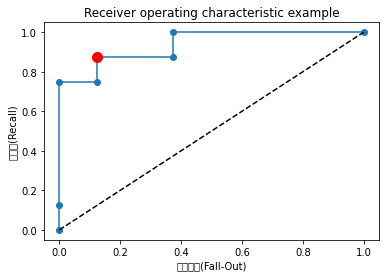

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def print_roc(y, pre_y, c_matrix):  
  fpr, tpr, thresholds = roc_curve(y, pre_y)
  print(fpr, tpr, thresholds)
  recall, fallout = get_matrics_info(c_matrix)
  
  plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
  plt.plot([0, 1], [0, 1], 'k--', label="random guess")
  plt.plot([fallout], [recall], 'ro', ms=10)
  plt.xlabel('위양성률(Fall-Out)')
  plt.ylabel('재현률(Recall)')
  plt.title('Receiver operating characteristic example')
  plt.show()

print_roc(y, L_model.decision_function(X), c_matrix)

In [23]:
#MNIST결과를 ROC에 적용
pre_y_argmax = np.argmax(pre_y, axis=-1)
print(pre_y_argmax.shape)
print(y_test.shape)

mnist_c_matrix = confusion_matrix(y_test, pre_y_argmax, labels=[1, 0])
print(mnist_c_matrix)
print(get_matrics_info(mnist_c_matrix))

print_roc(y_test, pre_y_argmax, mnist_c_matrix)

(10000,)
(10000,)
[[1132    0]
 [   1  974]]
TP: 1132
FN: 0
recall: 1.0
FP: 1
TN: 974
fallout: 0.0010256410256410256
(1.0, 0.0010256410256410256)


ValueError: ignored

In [20]:
#Plot ROC curves for the multilabel problem
#todo. y_test, pre_y_argmax => 클래스별로 뽑아내야가능

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(y_test_cate[0])
print('n_classes:', n_classes)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pre_y_argmax[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pre_y_argmax.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

n_classes: 10


TypeError: ignored